In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
## LOAD THE DATASET INTO THE PROJECT

In [3]:
columns_names = ["user_id","item_id","ratings","timestamp"]
df = pd.read_csv("u.data",sep='\t', names = columns_names)
df.head()

,user_id,item_id,ratings,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
df.shape

(100000, 4)

In [5]:
## Extracting the number of unique user id's

In [6]:
df['user_id'].nunique()

943

In [7]:
## number of unique items

In [8]:
df['item_id'].nunique()

1682

In [9]:
## number of ratings on the scale

In [10]:
df['ratings'].nunique()

5

In [11]:
d2 = pd.read_csv('u.item', sep='\|', header = None)
d2.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
titles = d2[[0,1]]
titles.columns =['item_id','movie_name']
titles.head()

,item_id,movie_name
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [13]:
## merge df and titles

In [14]:
movies = pd.merge(df,titles,on="item_id")
movies.tail()

,user_id,item_id,ratings,timestamp,movie_name
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


In [15]:
## EXPLORING THE DATA 

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [17]:
movies.groupby('movie_name').mean()['ratings'].sort_values(ascending = False)

movie_name
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: ratings, Length: 1664, dtype: float64

movies

In [18]:
movies

,user_id,item_id,ratings,timestamp,movie_name
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [19]:
movies. groupby('movie_name').count()['ratings'].sort_values(ascending = False)


movie_name
Star Wars (1977)                              583
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: ratings, Length: 1664, dtype: int64

In [20]:
## creating a df with movie name, average rating, number of ratings

In [21]:
ratings = pd.DataFrame(movies.groupby('movie_name').mean()['ratings'])
ratings['number of ratings'] = pd.DataFrame(movies. groupby('movie_name').count()['ratings'])
ratings.head()

,ratings,number of ratings
movie_name,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [22]:
ratings.sort_values(by = "ratings", ascending = False).head()

,ratings,number of ratings
movie_name,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3


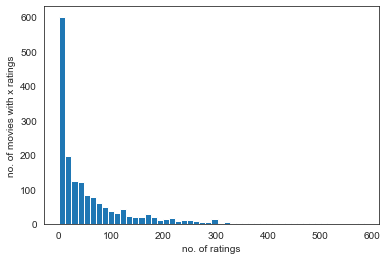

In [23]:
plt.hist(ratings["number of ratings"], bins = 50)
plt.xlabel("no. of ratings")
plt.ylabel("no. of movies with x ratings")
plt.show()

In [24]:
## CONCLUSIONS:
## VERY FEW MOVIES ARE RATED MORE THAN AROUND 150 TIMES
## MORE NUM OF MOVIES ARE RATED <100 TIMES
## RATINGS OF MOVIES WHICH HAVE BEEN RATED LESSER THAN (SAY) 100 TIMES CAN BE CONSIDERED IRRELEVANT

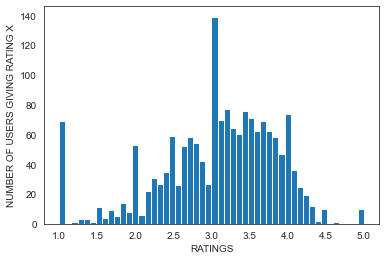

In [25]:
plt.hist(ratings["ratings"], bins = 50)
plt.xlabel("RATINGS")
plt.ylabel("NUMBER OF USERS GIVING RATING X")
plt.show()

In [26]:
## CONCLUSIONS
## MOST NUM OF USERS HAVE RATED THE MOVIE B/W 3 AND 4
## LESS THAN 50 RATINGS ABOVE 4.5

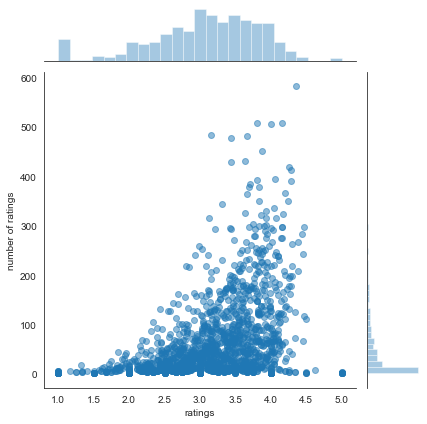

In [27]:
sns.jointplot(x ="ratings" , y ="number of ratings" , data = ratings, alpha = 0.5)

In [28]:
## CONCLUSIONS
## MOSTLY HIGHER NUMBER OF RATINGS CORRESPOND TO HIGHER VALUE OF RATINGS

In [29]:
## MODEL FOR MOVIE RECOMMENDATION

In [30]:
moviemat = movies.pivot_table(index = "user_id" ,columns = "movie_name", values = "ratings")
moviemat

movie_name,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
ratings.sort_values(by = "number of ratings", ascending = False)
## HIGHLY WATCHED MOVIES

,ratings,number of ratings
movie_name,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [32]:
star_wars_rate = moviemat["Star Wars (1977)"]
star_wars_rate.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [33]:
similar = moviemat.corrwith(star_wars_rate)
## correlation to star wars(a highly atched and rated movie) is established
## NAN indicates that no person watched both movie X and star wars
similar

movie_name
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [34]:
corr_sw = pd.DataFrame(similar,columns = ["correlation"])
corr_sw.dropna(inplace = True)
corr_sw.sort_values(by = "correlation", ascending = False).head(20)

,correlation
movie_name,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [38]:
corr_sw = ratings.join(corr_sw)
recommend = pd.DataFrame(corr_sw[corr_sw["number of ratings"]>100].sort_values(by = "correlation", ascending = False))


In [39]:
recommend.head(20)

,ratings,number of ratings,correlation
movie_name,,,
Star Wars (1977),4.358491,583,1.000000
"Empire Strikes Back, The (1980)",4.204360,367,0.747981
Return of the Jedi (1983),4.007890,507,0.672556
Raiders of the Lost Ark (1981),4.252381,420,0.536117
Austin Powers: International Man of Mystery (1997),3.246154,130,0.377433
"Sting, The (1973)",4.058091,241,0.367538
Indiana Jones and the Last Crusade (1989),3.930514,331,0.350107
Pinocchio (1940),3.673267,101,0.347868
"Frighteners, The (1996)",3.234783,115,0.332729


In [40]:
def predict(movieName):
    movie_rating = moviemat[movieName]
    similar = moviemat.corrwith(movie_rating)
    corr_m = pd.DataFrame(similar,columns = ["correlation"])
    corr_m.dropna(inplace = True)
    corr_m = corr_m.join(ratings["number of ratings"])
    ans = pd.DataFrame(corr_m[corr_m["number of ratings"]>100].sort_values(by = "correlation", ascending = False))
    return ans

In [41]:
mn = input()
pre = predict(mn)
pre.head(20)

 Batman (1989)


,correlation,number of ratings
movie_name,,
Batman (1989),1.000000,201
Alien: Resurrection (1997),0.670507,124
Scream 2 (1997),0.601410,106
Good Will Hunting (1997),0.591879,198
Cold Comfort Farm (1995),0.564546,125
That Thing You Do! (1996),0.530606,176
"Hunchback of Notre Dame, The (1996)",0.499937,127
Batman Returns (1992),0.484477,142
Young Guns (1988),0.478900,101
